In [ ]:
!pip install -U googlemaps
!pip install geopy

  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38554 sha256=2ea299741cf007062197cc2fb79354b00a8e3476c462017a012b6628014bb22a
  Stored in directory: /root/.cache/pip/wheels/80/db/c0/6d958585fa97b20e250bf437acf7e6e715b4809c2dd4e55367
Successfully built googlemaps


In [ ]:
import googlemaps
from datetime import datetime
import requests
import pandas as pd
import json
import sys
from geopy.geocoders import Nominatim
from IPython.display import Image, display

In [ ]:
def getData(location, api_key, type_of="restaurant", radius=50000):

  file_name=f"drive/MyDrive/{type_of}.pkl"

  place=location

  location = Nominatim(user_agent="GetLoc")
  getLocation = location.geocode(place)

  lat = getLocation.latitude
  long = getLocation.longitude

  radius=radius #Distance from coordinates in meters
  type_of=type_of # restaurant, tourist_attraction, lodging, depending on what you're looking for
  key=api_key


  if type_of not in ["lodging", "restaurant", "tourist_attraction", "aquarium", "zoo", "night_club"]:
    url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={lat}%2C{long}&radius={radius}&keyword={type_of}&key={key}"
  else:
    url = f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={lat}%2C{long}&radius={radius}&type={type_of}&key={key}"

  payload={}
  headers = {}

  response = requests.request("GET", url, headers=headers, data=payload)

  response = json.loads(response.text)

  df = pd.DataFrame(columns=["name", "latitude", "longitude", "photo_ref", "price_level", "rating", "rating_count", "vicinity", "types"])

  for i in range(len(response["results"])):
    print(i)
    place = response["results"][i]

    if "price_level" in place.keys():
      level = place["price_level"]
    else:
      level = None

    if "photos" in place.keys():
      photo_id = place["photos"][0]["photo_reference"]
    else:
      photo_id = None

    if "rating" in place.keys():
      rating = place["rating"]
    else:
      rating = None

    if "user_ratings_total" in place.keys():
      count = place["user_ratings_total"]
    else:
      count = None

    if i != 0:
      row = pd.Series([place["name"], place["geometry"]["location"]["lat"], 
                        place["geometry"]["location"]["lng"],
                        photo_id, level, 
                        rating, count, place["vicinity"], 
                        place["types"]], index=df.columns)
      df = df.append(row, ignore_index=True)

  df.to_pickle(file_name)

  return df

    

In [ ]:
def getPhoto(df, api_key, df_idx=0, max_width=800):
  max_width=max_width
  photo_idx=df_idx

  url = f"""https://maps.googleapis.com/maps/api/place/photo?maxwidth={max_width}&sensor=False&photoreference={df["photo_ref"][photo_idx]}&key={api_key}"""

  payload={}
  headers = {}

  response = requests.request("GET", url)

  display(Image(response.content))

In [ ]:
key="Insert API Key Here"

hotels = getData(location="New York", api_key=key, type_of="lodging", radius=50000)
restaurants = getData(location="New York", api_key=key, type_of="restaurant", radius=50000)
attractions = getData(location="New York", api_key=key, type_of="tourist_attraction", radius=50000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


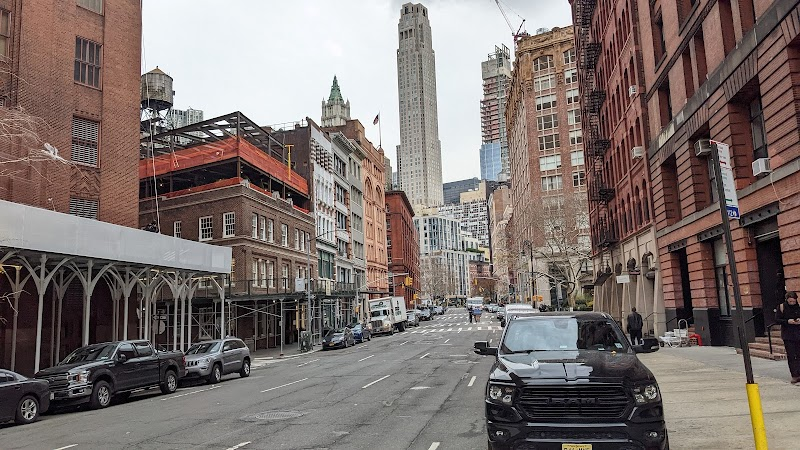

In [ ]:
getPhoto(hotels, api_key=key)

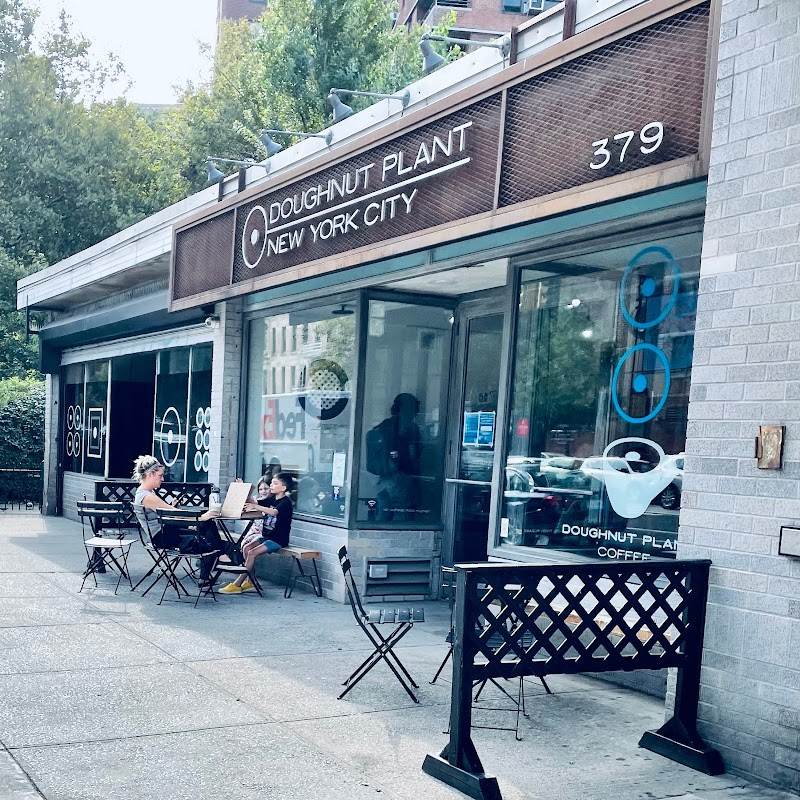

In [ ]:
getPhoto(restaurants, api_key=key)

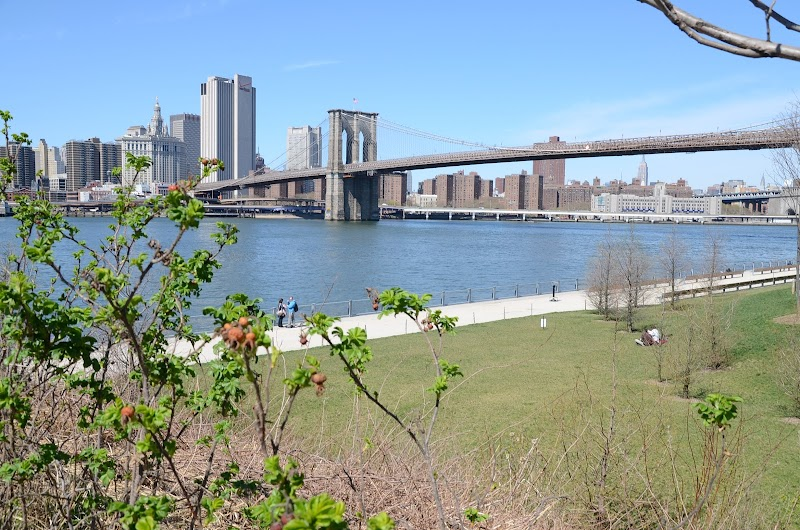

In [ ]:
getPhoto(attractions, api_key=key)

In [ ]:
# import json
 
# # Opening JSON file
# with open('drive/MyDrive/hotels.json') as json_file:
#     data = json.load(json_file)

In [ ]:
# data["hotels"][5]

{'allInclusiveRateProperty': False,
 'bedChoiceAvailable': False,
 'dealTypes': ['EXPRESS_DEAL'],
 'displayRank': 9995.0,
 'globalDealScore': 3.573245,
 'hotelFeatures': {'hotelAmenities': [{'code': 'FBRKFST',
    'free': True,
    'name': 'Free Breakfast'},
   {'code': 'FINTRNT', 'free': True, 'name': 'Free Internet Access'},
   {'code': 'FINTRPUB', 'free': True, 'name': 'Free Internet In Public Areas'},
   {'code': 'HEALTHSVCS', 'free': False, 'name': 'Health Services'},
   {'code': 'KITCHEN', 'free': False, 'name': 'Kitchen/Kitchenette'},
   {'code': 'FITSPA', 'free': False, 'name': 'Fitness Center'},
   {'code': 'PETALLOW', 'free': False, 'name': 'Pets Allowed'},
   {'code': 'HANDFAC', 'free': False, 'name': 'Handicapped Rooms/Facilities'},
   {'code': 'NSMKFAC', 'free': False, 'name': 'No Smoking Rooms/Facilities'}],
  'hotelAmenityCodes': ['FBRKFST',
   'FINTRNT',
   'FINTRPUB',
   'HEALTHSVCS',
   'KITCHEN',
   'FITSPA',
   'PETALLOW',
   'HANDFAC',
   'NSMKFAC']},
 'hotelType':

In [ ]:
# hotel_df = pd.DataFrame(columns=["allInclusiveRateProperty", "displayRank", 
#                                  "globalDealScore", "hotelFeatures",
#                                  "latitude", "longitude", "image_url", 
#                                  "address", "name", "overallGuestRating", 
#                                  "freeCancelableRateAvail", "minPrice", 
#                                  "minCurrencyCode", "payWhenYouStayAvailable", 
#                                  "recmdScore", "starRating", "reviewCount"])

# for i in range(len(data["hotels"])):
#   print(i)
#   place = data["hotels"][i]
#   if "freeCancelableRateAvail" in place.keys():
#     cancelable = place["freeCancelableRateAvail"]
#   else:
#     cancelable = None

#   if "latitude" in place["location"].keys():
#     latitude = place["location"]["latitude"]
#   else:
#     latitude = None

#   if "longitude" in place["location"].keys():
#     longitude = place["location"]["longitude"]
#   else:
#     longitude = None

#   if "media" in place.keys():
#     url = place["media"]["url"]
#   else:
#     url = None

#   if "name" in place.keys():
#     name = place["name"]
#   else:
#     name = None

#   if "totalReviewCount" in place.keys():
#     count = place["totalReviewCount"]
#   else:
#     count = None

#   row = pd.Series([place["allInclusiveRateProperty"], place["displayRank"], 
#                       place["globalDealScore"], place["hotelFeatures"], 
#                       latitude, longitude, url,
#                       place["location"]["address"],
#                       name, place["overallGuestRating"], cancelable, 
#                       place["ratesSummary"]["minPrice"], place["ratesSummary"]["minCurrencyCode"],
#                       place["ratesSummary"]["payWhenYouStayAvailable"], place["recmdScore"],
#                       place["starRating"], count], index=hotel_df.columns)
#   hotel_df = hotel_df.append(row, ignore_index=True)

0
1
2
3
4
5


In [ ]:
# hotel_df.head()

,allInclusiveRateProperty,displayRank,globalDealScore,hotelFeatures,latitude,longitude,image_url,address,name,overallGuestRating,freeCancelableRateAvail,minPrice,minCurrencyCode,payWhenYouStayAvailable,recmdScore,starRating,reviewCount
0,False,10000.0,2.585633,"{'hotelAmenityCodes': ['FBRKFST', 'FINTRNT', '...",52.50491,13.32651,https://mobileimg.pclncdn.com/htlimg/master/10...,"{'addressLine1': 'Uhlandstrasse 188-189', 'cit...",Hampton By Hilton Berlin City West,8.9,None,131.70,USD,True,0.0,3.5,19
1,False,9999.0,0.000000,"{'hotelAmenityCodes': ['FBRKFST', 'FINTRNT', '...",52.5018,13.3856,https://mobileimg.pclncdn.com/htlimg/master/19...,"{'addressLine1': 'Stresemannstr. 49', 'cityNam...",Holiday Inn Express Berlin City Centre,8.7,None,108.75,USD,True,0.0,3.0,19
2,False,9998.0,0.000000,"{'hotelAmenityCodes': ['FBRKFST', 'FINTRNT', '...",52.50494,13.440977,https://mobileimg.pclncdn.com/htlimg/master/64...,"{'addressLine1': 'Mildred-Harnack-Strasse 15',...",Hampton by Hilton Berlin City East Side Gallery,9.5,None,125.06,USD,True,0.0,3.5,2
3,False,9997.0,0.000000,"{'hotelAmenityCodes': ['FBRKFST', 'FINTRNT', '...",52.525,13.418693,https://mobileimg.pclncdn.com/htlimg/master/63...,"{'addressLine1': 'Otto-Braun-Strasse 69', 'cit...",Hampton by Hilton Berlin City Centre Alexander...,8.0,None,120.01,USD,True,0.0,3.5,1
4,False,9996.0,3.978707,"{'hotelAmenities': [{'code': 'FBRKFST', 'free'...",None,None,None,"{'cityName': 'Berlin', 'countryName': 'Germany...",None,8.0,None,84.00,USD,False,0.0,3.0,10


In [ ]:
# import requests

# url = "https://hotels4.p.rapidapi.com/properties/get-details"

# querystring = {"id":"424023","checkIn":"2023-01-08","checkOut":"2023-01-15","adults1":"1","currency":"USD","locale":"en_US"}

# headers = {
#     'x-rapidapi-host': "hotels4.p.rapidapi.com",
#     'x-rapidapi-key': "774b07103bmsh7f4b47f00895eafp1ff206jsn58ad64733028"
#     }

# response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

{"result":"OK","data":{"body":{"pdpHeader":{"hotelId":"424023","destinationId":"1506246","pointOfSaleId":"HCOM_US","currencyCode":"USD","occupancyKey":"A1","hotelLocation":{"coordinates":{"latitude":40.752109,"longitude":-73.985461},"resolvedLocation":"CITY:1506246:PROVIDED:PROVIDED","locationName":"New York"}},"overview":{"overviewSections":[{"title":"Main amenities","type":"HOTEL_FEATURE","content":["197 smoke-free guestrooms","Daily housekeeping","Restaurant and 2 bars/lounges","Rooftop terrace","Breakfast available","Fitness center","Self parking","24-hour front desk","Air conditioning","Front desk safe","ATM/banking services","Laundry service","Free WiFi "],"contentType":"LIST"},{"title":"What’s around","type":"LOCATION_SECTION","content":["In Manhattan","5th Avenue - 2 min walk","Bryant Park - 3 min walk","Macy's - 4 min walk","Herald Square - 4 min walk","New York Public Library - 5 min walk","Times Square - 6 min walk","Town Hall - 7 min walk","Empire State Building - 8 min wal

In [ ]:
# hotels = json.loads(response.text)

In [ ]:
# hotels["data"]["body"]

{'amenities': [{'heading': 'In the hotel',
   'listItems': [{'heading': 'Food and drink',
     'listItems': ['Full breakfast daily (surcharge)',
      '2 bars/lounges',
      'Restaurant',
      'Coffee shop/café',
      'Room service (during limited hours)']},
    {'heading': 'Things to do', 'listItems': ['Fitness facilities']},
    {'heading': 'Services',
     'listItems': ['24-hour front desk',
      'Concierge services',
      'Tours/ticket assistance',
      'Dry cleaning/laundry service',
      'Free newspapers in lobby',
      'Luggage storage',
      'Multilingual staff',
      'Porter/bellhop']},
    {'heading': 'Facilities',
     'listItems': ['Number of buildings/towers -  1',
      'Year Built -  1912',
      'Elevator',
      'ATM/banking',
      'Safe-deposit box at front desk',
      'Rooftop terrace']},
    {'heading': 'Accessibility',
     'listItems': ['Braille or raised signage',
      'Accessible bathroom',
      'In-room accessibility',
      'Roll-in shower']},
  

{'data': {'body': {'amenities': [{'heading': 'In the hotel',
     'listItems': [{'heading': 'Food and drink',
       'listItems': ['Full breakfast daily (surcharge)',
        '2 bars/lounges',
        'Restaurant',
        'Coffee shop/café',
        'Room service (during limited hours)']},
      {'heading': 'Things to do', 'listItems': ['Fitness facilities']},
      {'heading': 'Services',
       'listItems': ['24-hour front desk',
        'Concierge services',
        'Tours/ticket assistance',
        'Dry cleaning/laundry service',
        'Free newspapers in lobby',
        'Luggage storage',
        'Multilingual staff',
        'Porter/bellhop']},
      {'heading': 'Facilities',
       'listItems': ['Number of buildings/towers -  1',
        'Year Built -  1912',
        'Elevator',
        'ATM/banking',
        'Safe-deposit box at front desk',
        'Rooftop terrace']},
      {'heading': 'Accessibility',
       'listItems': ['Braille or raised signage',
        'Accessible 

In [ ]:
# import requests

# url = "https://hotels4.p.rapidapi.com/locations/v2/search"

# querystring = {"query":"chicago","locale":"en_US","currency":"USD"}

# headers = {
#     'x-rapidapi-host': "hotels4.p.rapidapi.com",
#     'x-rapidapi-key': "774b07103bmsh7f4b47f00895eafp1ff206jsn58ad64733028"
#     }

# response = requests.request("GET", url, headers=headers, params=querystring)

# hotels = json.loads(response.text)

In [ ]:
# hotels["suggestions"][1]

{'entities': [{'caption': "Hilton <span class='highlighted'>Chicago</span> O'Hare Airport, Chicago, Illinois, United States of America",
   'destinationId': '205274',
   'geoId': '8058',
   'landmarkCityDestinationId': None,
   'latitude': 41.977599,
   'longitude': -87.904106,
   'name': "Hilton Chicago O'Hare Airport",
   'redirectPage': 'DEFAULT_PAGE',
   'searchDetail': None,
   'type': 'HOTEL'}],
 'group': 'HOTEL_GROUP'}